In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/WELFake_Dataset.csv.zip')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
df.drop(columns=['Unnamed: 0'], axis = 1 ,inplace = True)

In [6]:
df.isnull().sum()

,0
title,558
text,39
label,0


In [7]:
df.fillna(' ', inplace = True)

In [8]:
df.isnull().sum()

,0
title,0
text,0
label,0


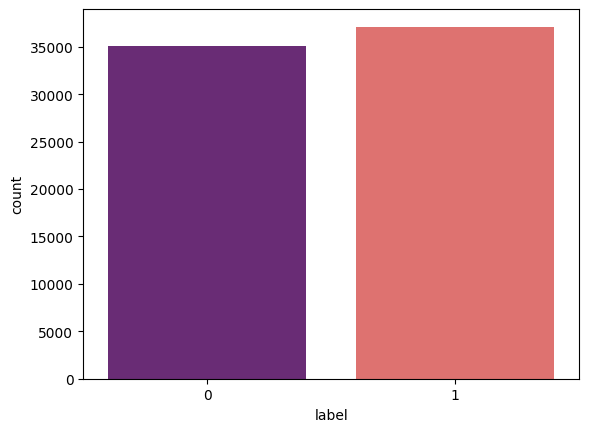

In [9]:
sns.countplot(x = 'label', data = df,palette = 'magma')
plt.show()

In [10]:
portStemmer=PorterStemmer()

In [11]:
def stemming(content):
    content = str(content)
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [portStemmer.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [13]:
df['title'].head(5)

,title
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...


In [14]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [15]:
X=df['title'].values
y=df['label'].values

In [16]:
vectorizer=TfidfVectorizer()
vectorizer.fit(X)

X=vectorizer.transform(X)

In [17]:
print(X)

  (0, 68)	0.38266766556795945
  (0, 1143)	0.164192715246627
  (0, 1322)	0.2530883842409479
  (0, 1599)	0.22132507088530579
  (0, 3344)	0.2638190430588793
  (0, 6257)	0.21946866930433404
  (0, 9264)	0.2652564729952861
  (0, 10776)	0.25705250003365687
  (0, 11241)	0.38266766556795945
  (0, 12804)	0.2116697726702732
  (0, 15433)	0.18541785704030583
  (0, 18787)	0.1996586717646441
  (0, 26779)	0.21861333044141215
  (0, 26942)	0.23655937467079818
  (0, 28755)	0.1027044357984874
  (0, 29437)	0.28210174626310003
  (2, 2286)	0.24965954497275644
  (2, 4595)	0.2686660376559846
  (2, 4954)	0.31738125904392944
  (2, 11446)	0.23922226750802056
  (2, 12738)	0.19357653956616283
  (2, 12988)	0.24068647477771304
  (2, 13641)	0.1017051424677212
  (2, 17606)	0.22436660293014749
  (2, 18368)	0.19458270773534933
  :	:
  (72131, 13641)	0.13227673129837664
  (72131, 15513)	0.33393145158399323
  (72131, 17116)	0.34319406689920245
  (72131, 21989)	0.33267989072438514
  (72131, 21999)	0.39549216053268094
  (721

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [19]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred=lr.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.9081583142718513

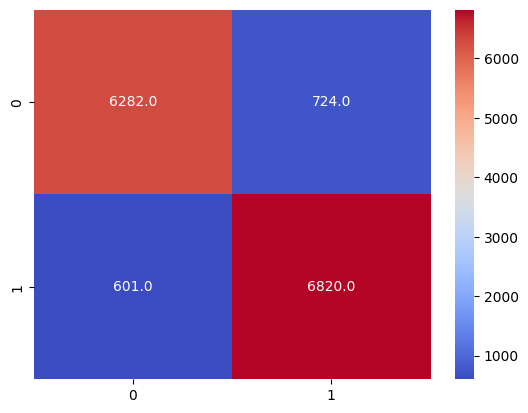

In [22]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = 'coolwarm',fmt = '.1f')
plt.show()

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7006
           1       0.90      0.92      0.91      7421

    accuracy                           0.91     14427
   macro avg       0.91      0.91      0.91     14427
weighted avg       0.91      0.91      0.91     14427



In [24]:
X_new=X_test[45]
prediction=lr.predict(X_new)
print(prediction)

if (prediction==0):
    print('The news is fake')
else:
    print('The news is real')

[0]
The news is fake


In [25]:
print(y_test[45])

0
